In [1]:
# Formatting
%reload_ext nb_black

<IPython.core.display.Javascript object>

In this notebook, I will be investigating the Anime Recommendations Database. This dataset can be found on Kaggle - https://www.kaggle.com/CooperUnion/anime-recommendations-database

In [2]:
# Imports for dataset operations
import pandas as pd
import numpy as np

# Imports for visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# For performing t-test
from scipy import stats

<IPython.core.display.Javascript object>

In [3]:
# Formatting
%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
# Defining function for calculating the 95% confidence interval
def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi

<IPython.core.display.Javascript object>

In [5]:
# Create the DataFrame and check the head of the dataset
df = pd.read_csv("data/anime.csv")

<IPython.core.display.Javascript object>

In [6]:
# df.sort_values(by=["rating"], ascending=False)
df.head(4)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572


<IPython.core.display.Javascript object>

In [7]:
# Considerations: how to consider anime containing the same name like Gintama° and Gintama&#039;
# wich both have similar data except for: anime_id, name, rating, and members.

<IPython.core.display.Javascript object>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


<IPython.core.display.Javascript object>

In [9]:
df["type"].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

<IPython.core.display.Javascript object>

In [10]:
tv_anime = df[df["type"] == "TV"]

<IPython.core.display.Javascript object>

In [11]:
tv_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3787 entries, 1 to 11111
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  3787 non-null   int64  
 1   name      3787 non-null   object 
 2   genre     3777 non-null   object 
 3   type      3787 non-null   object 
 4   episodes  3787 non-null   object 
 5   rating    3671 non-null   float64
 6   members   3787 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 236.7+ KB


<IPython.core.display.Javascript object>

In [13]:
tv_anime = tv_anime[~tv_anime["rating"].isna()]

<IPython.core.display.Javascript object>

In [14]:
tv_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 1 to 10895
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  3671 non-null   int64  
 1   name      3671 non-null   object 
 2   genre     3668 non-null   object 
 3   type      3671 non-null   object 
 4   episodes  3671 non-null   object 
 5   rating    3671 non-null   float64
 6   members   3671 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 229.4+ KB


<IPython.core.display.Javascript object>

In [15]:
tv_anime = tv_anime[tv_anime["episodes"] != "Unknown"]

<IPython.core.display.Javascript object>

In [16]:
tv_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3570 entries, 1 to 10895
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  3570 non-null   int64  
 1   name      3570 non-null   object 
 2   genre     3568 non-null   object 
 3   type      3570 non-null   object 
 4   episodes  3570 non-null   object 
 5   rating    3570 non-null   float64
 6   members   3570 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 223.1+ KB


<IPython.core.display.Javascript object>

In [17]:
tv_anime["episodes"] = tv_anime["episodes"].astype(int)

<IPython.core.display.Javascript object>

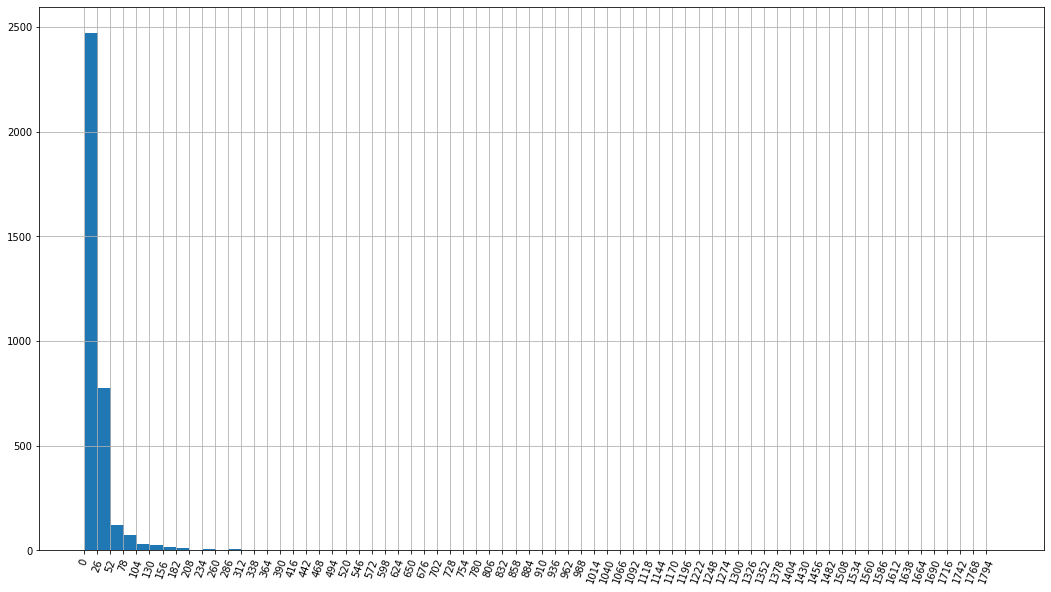

<IPython.core.display.Javascript object>

In [54]:
tv_anime["episodes"].hist(figsize=(18, 10), bins=70)
x_ticks = np.arange(0, 1819, 26)
plt.xticks(x_ticks, rotation=70)
plt.show()

In [19]:
tv_anime["episodes"].max()

1818

<IPython.core.display.Javascript object>

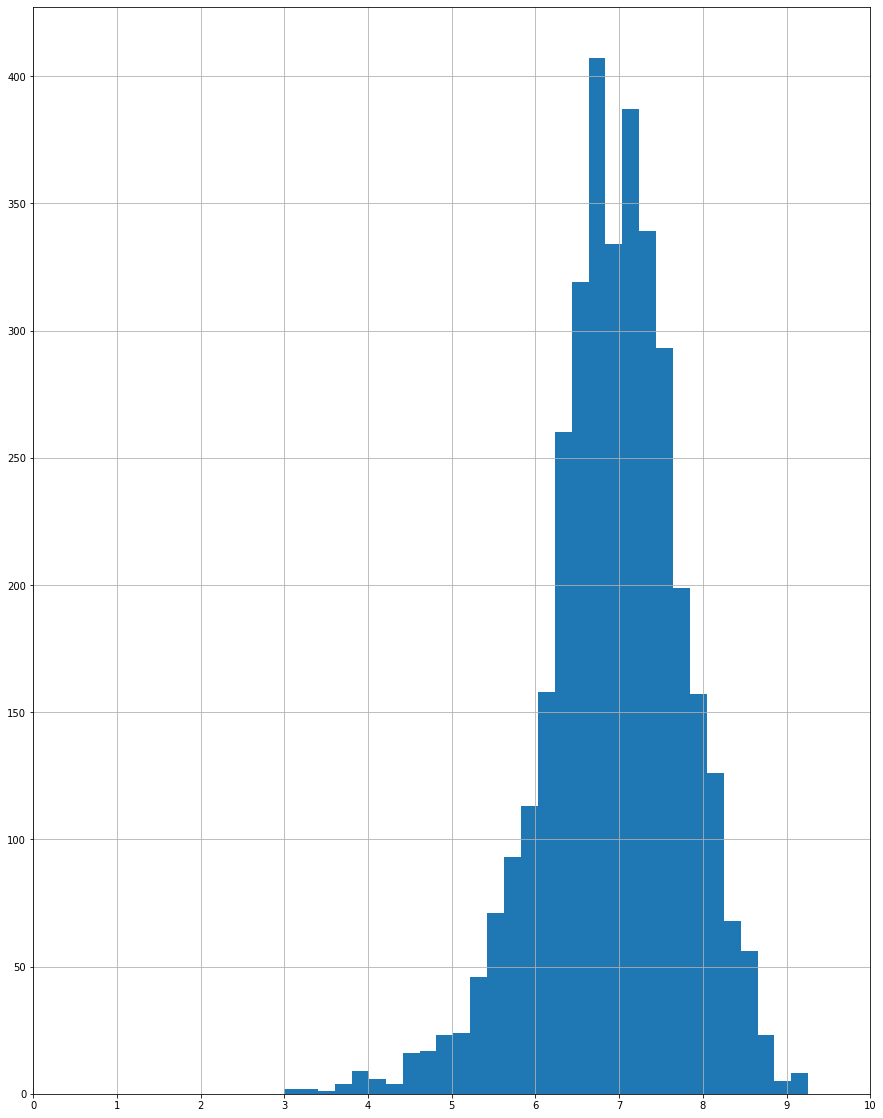

<IPython.core.display.Javascript object>

In [20]:
tv_anime["rating"].hist(figsize=(15, 20), bins=31)
x_ticks = np.arange(0, 11, 1)
plt.xticks(x_ticks)
plt.show()

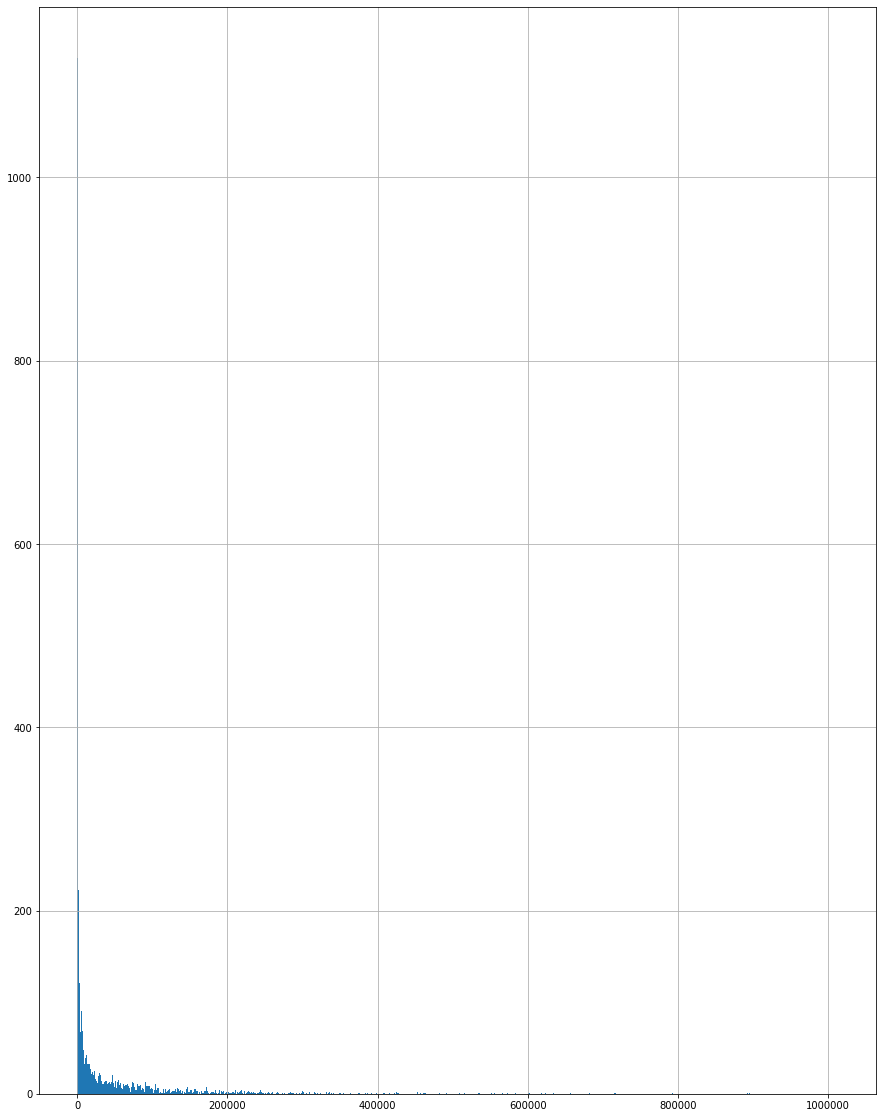

<IPython.core.display.Javascript object>

In [21]:
tv_anime["members"].hist(figsize=(15, 20), bins=1000)
# x_ticks = np.arange(0, 1000000, 1000)
# plt.xticks(x_ticks)
plt.show()

In [22]:
# Try a corr plot to check corelations between numerocal data.
# Can turn non-numerical data into numerical for a more in-depth and insightful analysis.

<IPython.core.display.Javascript object>

In [23]:
# Separate groups of anime by how many episodes they have
tv_anime.loc[tv_anime["episodes"] <= 26, "one_season"] = "less"
tv_anime.loc[tv_anime["episodes"] > 26, "one_season"] = "more"

<IPython.core.display.Javascript object>

In [24]:
tv_anime.head()

,anime_id,name,genre,type,episodes,rating,members,one_season
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,more
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,more
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,less
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,more
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,less


<IPython.core.display.Javascript object>

In [25]:
tv_anime_less_ep = tv_anime[tv_anime["one_season"] == "less"]
tv_anime_more_ep = tv_anime[tv_anime["one_season"] == "more"]

<IPython.core.display.Javascript object>

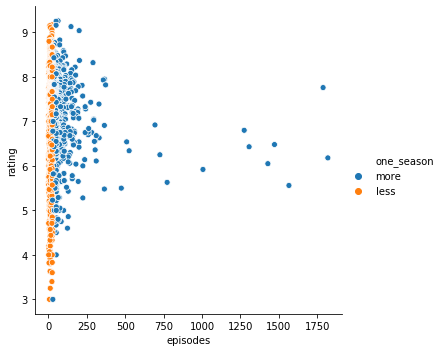

<IPython.core.display.Javascript object>

In [40]:
sns.relplot(x="episodes", y="rating", hue="one_season", data=tv_anime)

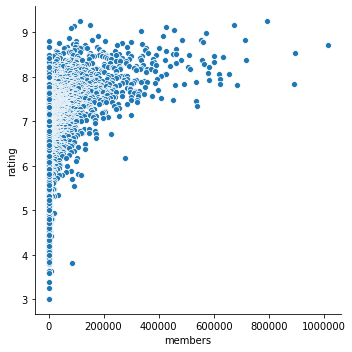

<IPython.core.display.Javascript object>

In [29]:
# Do animes with higher rating also have more fans?
# We can look at a scatter plot of anime group members vs the animes rating
sns.relplot(x="members", y="rating", data=tv_anime)

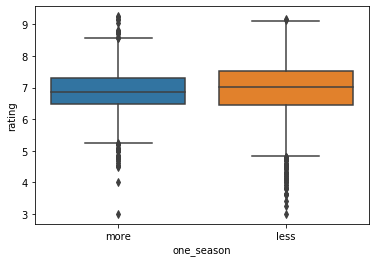

<IPython.core.display.Javascript object>

In [28]:
sns.boxplot(x="one_season", y="rating", data=tv_anime)
plt.show()

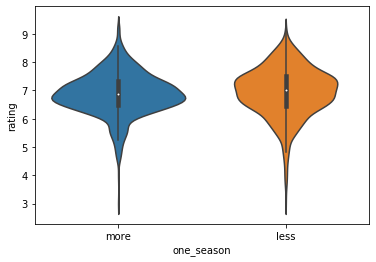

<IPython.core.display.Javascript object>

In [30]:
sns.violinplot(x="one_season", y="rating", data=tv_anime)
plt.show()

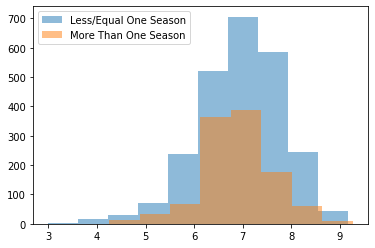

<IPython.core.display.Javascript object>

In [55]:
plt.hist(tv_anime_less_ep["rating"], label="Less/Equal One Season", alpha=0.5)
plt.hist(tv_anime_more_ep["rating"], label="More Than One Season", alpha=0.5)
plt.legend()
plt.show()

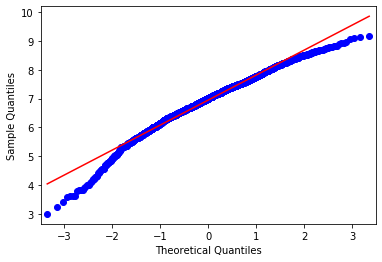

<IPython.core.display.Javascript object>

In [31]:
qqplot(tv_anime_less_ep["rating"], line="s")
plt.show()

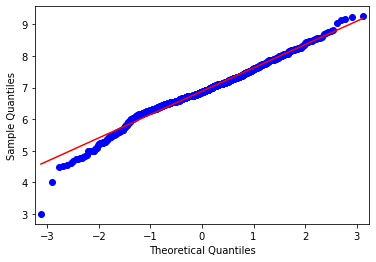

<IPython.core.display.Javascript object>

In [32]:
qqplot(tv_anime_more_ep["rating"], line="s")
plt.show()

In [45]:
stats.describe(tv_anime_less_ep["rating"])

DescribeResult(nobs=2458, minmax=(3.0, 9.17), mean=6.948616761594791, variance=0.7543739914486862, skewness=-0.6065290090566415, kurtosis=1.0098310090827916)

<IPython.core.display.Javascript object>

In [46]:
stats.describe(tv_anime_more_ep["rating"])

DescribeResult(nobs=1112, minmax=(3.0, 9.26), mean=6.886097122302158, variance=0.5463442497846906, skewness=-0.2936668739479996, kurtosis=1.4017960933232727)

<IPython.core.display.Javascript object>

In [43]:
# Simple variance comparison
less_ep_var = round(tv_anime_less_ep["rating"].var(), 2)
more_ep_var = round(tv_anime_more_ep["rating"].var(), 2)
print(
    f"Variance of sample with one season or less: {less_ep_var}\nVariance of sample with more than one season: {more_ep_var}"
)

Variance of sample with one season or less: 0.75
Variance of sample with more than one season: 0.55


<IPython.core.display.Javascript object>

In [56]:
# Barttlet test of variance similarity
# Null: Variances are the same
# Alt: Variances are different
test_stat, p = stats.bartlett(tv_anime_less_ep["rating"], tv_anime_more_ep["rating"])
print(
    f"test_stat = {test_stat}, p = {p}.\n\nHypothesis check - Reject that null hypothesis (the samples variances are equal): {p < 0.05}"
)

test_stat = 38.105398501525066, p = 6.702443248062144e-10.

Hypothesis check - Reject that null hypothesis (the samples variances are equal): True


<IPython.core.display.Javascript object>

Need to filter "less" group to reduce variance. Filter only what makes sense: small members value, or filter small between 12 - 26 eps for one season identification. Look closer at anime with ratings of 4.5 or less.

In [33]:
t, p = stats.ttest_ind(tv_anime_less_ep["rating"], tv_anime_more_ep["rating"])

<IPython.core.display.Javascript object>

In [34]:
t

2.0831844201133416

<IPython.core.display.Javascript object>

In [35]:
p

0.03730544569955707

<IPython.core.display.Javascript object>

In [36]:
stats.describe(tv_anime_less_ep["rating"])

DescribeResult(nobs=2458, minmax=(3.0, 9.17), mean=6.948616761594791, variance=0.7543739914486862, skewness=-0.6065290090566415, kurtosis=1.0098310090827916)

<IPython.core.display.Javascript object>